<a href="https://colab.research.google.com/github/nicolaspsilva6/-rvore-de-Decis-o/blob/main/Arvore_de_decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Pacotes de preparação de Dados
import pandas as pd
import numpy as np
#Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns
#Pacotes de Modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
#Módulo de Análise Exploratória
import aed

In [5]:
#Lendo o arquivo
df=pd.read_csv('/content/Base_RH.csv',sep= ";")
df.head()

,Saiu_da_Empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Equilibrio_de_Vida,Tempo_de_empresa,Anos_no_mesmo_cargo,Anos_desde_a_ultima_promocao,Anos_com_o_mesmo_chefe
0,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,8,Sim,11,0,8,0,Ruim,6,4,0,5
1,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,1,Não,23,1,10,3,Muito bom,10,7,1,7
2,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,6,Sim,15,0,7,3,Muito bom,0,0,0,0
3,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,1,Sim,11,0,8,3,Muito bom,8,7,3,0
4,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,9,Não,12,1,6,3,Muito bom,2,2,2,2


In [13]:
#Criando um Target
df1=df["Target"]=np.where(df["Saiu_da_Empresa"]=="Sim",1,0)


In [8]:
#Fazendo a Análise
df_iv=aed.analise_iv(
    df,
    'Target',

)
df_iv.get_lista_iv()

/content/aed.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
/content/aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to

Target,IV
Variavel,
Saiu_da_Empresa,9.21
Salário,0.42
Faz_hora_extras?,0.40
Tempo_de_empresa,0.34
Tempo_de_carreira,0.34
Idade,0.31
Anos_no_mesmo_cargo,0.27
Anos_com_o_mesmo_chefe,0.26
Estado_Civil,0.22


In [11]:
#Tratando a planilha e transformando os valores em true e false
df_modelo=pd.get_dummies(df)
df_modelo.head()

,Idade,Distância_do_trabalho,Salário,Qte_Empresas_Trabalhadas,Perc_de_aumento,Qte_ações_da_empresa,Tempo_de_carreira,Horas_de_treinamento,Tempo_de_empresa,Anos_no_mesmo_cargo,...,Gênero_M,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Faz_hora_extras?_Não,Faz_hora_extras?_Sim,Equilibrio_de_Vida_Bom,Equilibrio_de_Vida_Excelente,Equilibrio_de_Vida_Muito bom,Equilibrio_de_Vida_Ruim
0,41,1,5993,8,11,0,8,0,6,4,...,True,False,False,True,False,True,False,False,False,True
1,49,8,5130,1,23,1,10,3,10,7,...,False,True,False,False,True,False,False,False,True,False
2,37,2,2090,6,15,0,7,3,0,0,...,False,False,False,True,False,True,False,False,True,False
3,33,3,2909,1,11,0,8,3,8,7,...,True,True,False,False,False,True,False,False,True,False
4,27,2,3468,9,12,1,6,3,2,2,...,False,True,False,False,True,False,False,False,True,False


In [16]:
# Definindo a variável alvo (o que queremos prever)
y = df_modelo['Target']

# Definindo as variáveis preditoras (que serão usadas para fazer a previsão)
# Exibindo as colunas do DataFrame para conferência
print(df_modelo.columns)

# Removendo a coluna alvo e colunas dummies redundantes
x = df_modelo.drop(['Target', 'Saiu_da_Empresa_Não', 'Saiu_da_Empresa_Sim'], axis=1)

Index(['Idade', 'Distância_do_trabalho', 'Salário', 'Qte_Empresas_Trabalhadas',
       'Perc_de_aumento', 'Qte_ações_da_empresa', 'Tempo_de_carreira',
       'Horas_de_treinamento', 'Tempo_de_empresa', 'Anos_no_mesmo_cargo',
       'Anos_desde_a_ultima_promocao', 'Anos_com_o_mesmo_chefe', 'Target',
       'Saiu_da_Empresa_Não', 'Saiu_da_Empresa_Sim',
       'Frequência de Viagens_Não viaja',
       'Frequência de Viagens_Viaja frequentemente',
       'Frequência de Viagens_Viaja raramente', 'Formação_Doutorado',
       'Formação_Ensino Médio', 'Formação_Ensino Superior',
       'Formação_Ensino Técnico', 'Formação_Mestrado', 'E-Sat_Alto',
       'E-Sat_Baixo', 'E-Sat_Muito Alto', 'E-Sat_Médio', 'Gênero_H',
       'Gênero_M', 'Estado_Civil_Casado', 'Estado_Civil_Divorciado',
       'Estado_Civil_Solteiro', 'Faz_hora_extras?_Não', 'Faz_hora_extras?_Sim',
       'Equilibrio_de_Vida_Bom', 'Equilibrio_de_Vida_Excelente',
       'Equilibrio_de_Vida_Muito bom', 'Equilibrio_de_Vida_Ruim'],
   

In [17]:
# Criando o modelo de árvore de decisão para prever o turnover (saída de funcionários)
# max_depth=3 limita a profundidade da árvore para evitar overfitting
# random_state=42 garante reprodutibilidade dos resultados
modelo_turnover = DecisionTreeClassifier(max_depth=3, random_state=42)

# Treinando (ajustando) o modelo com os dados de entrada (x) e a variável alvo (y)
modelo_turnover.fit(x, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

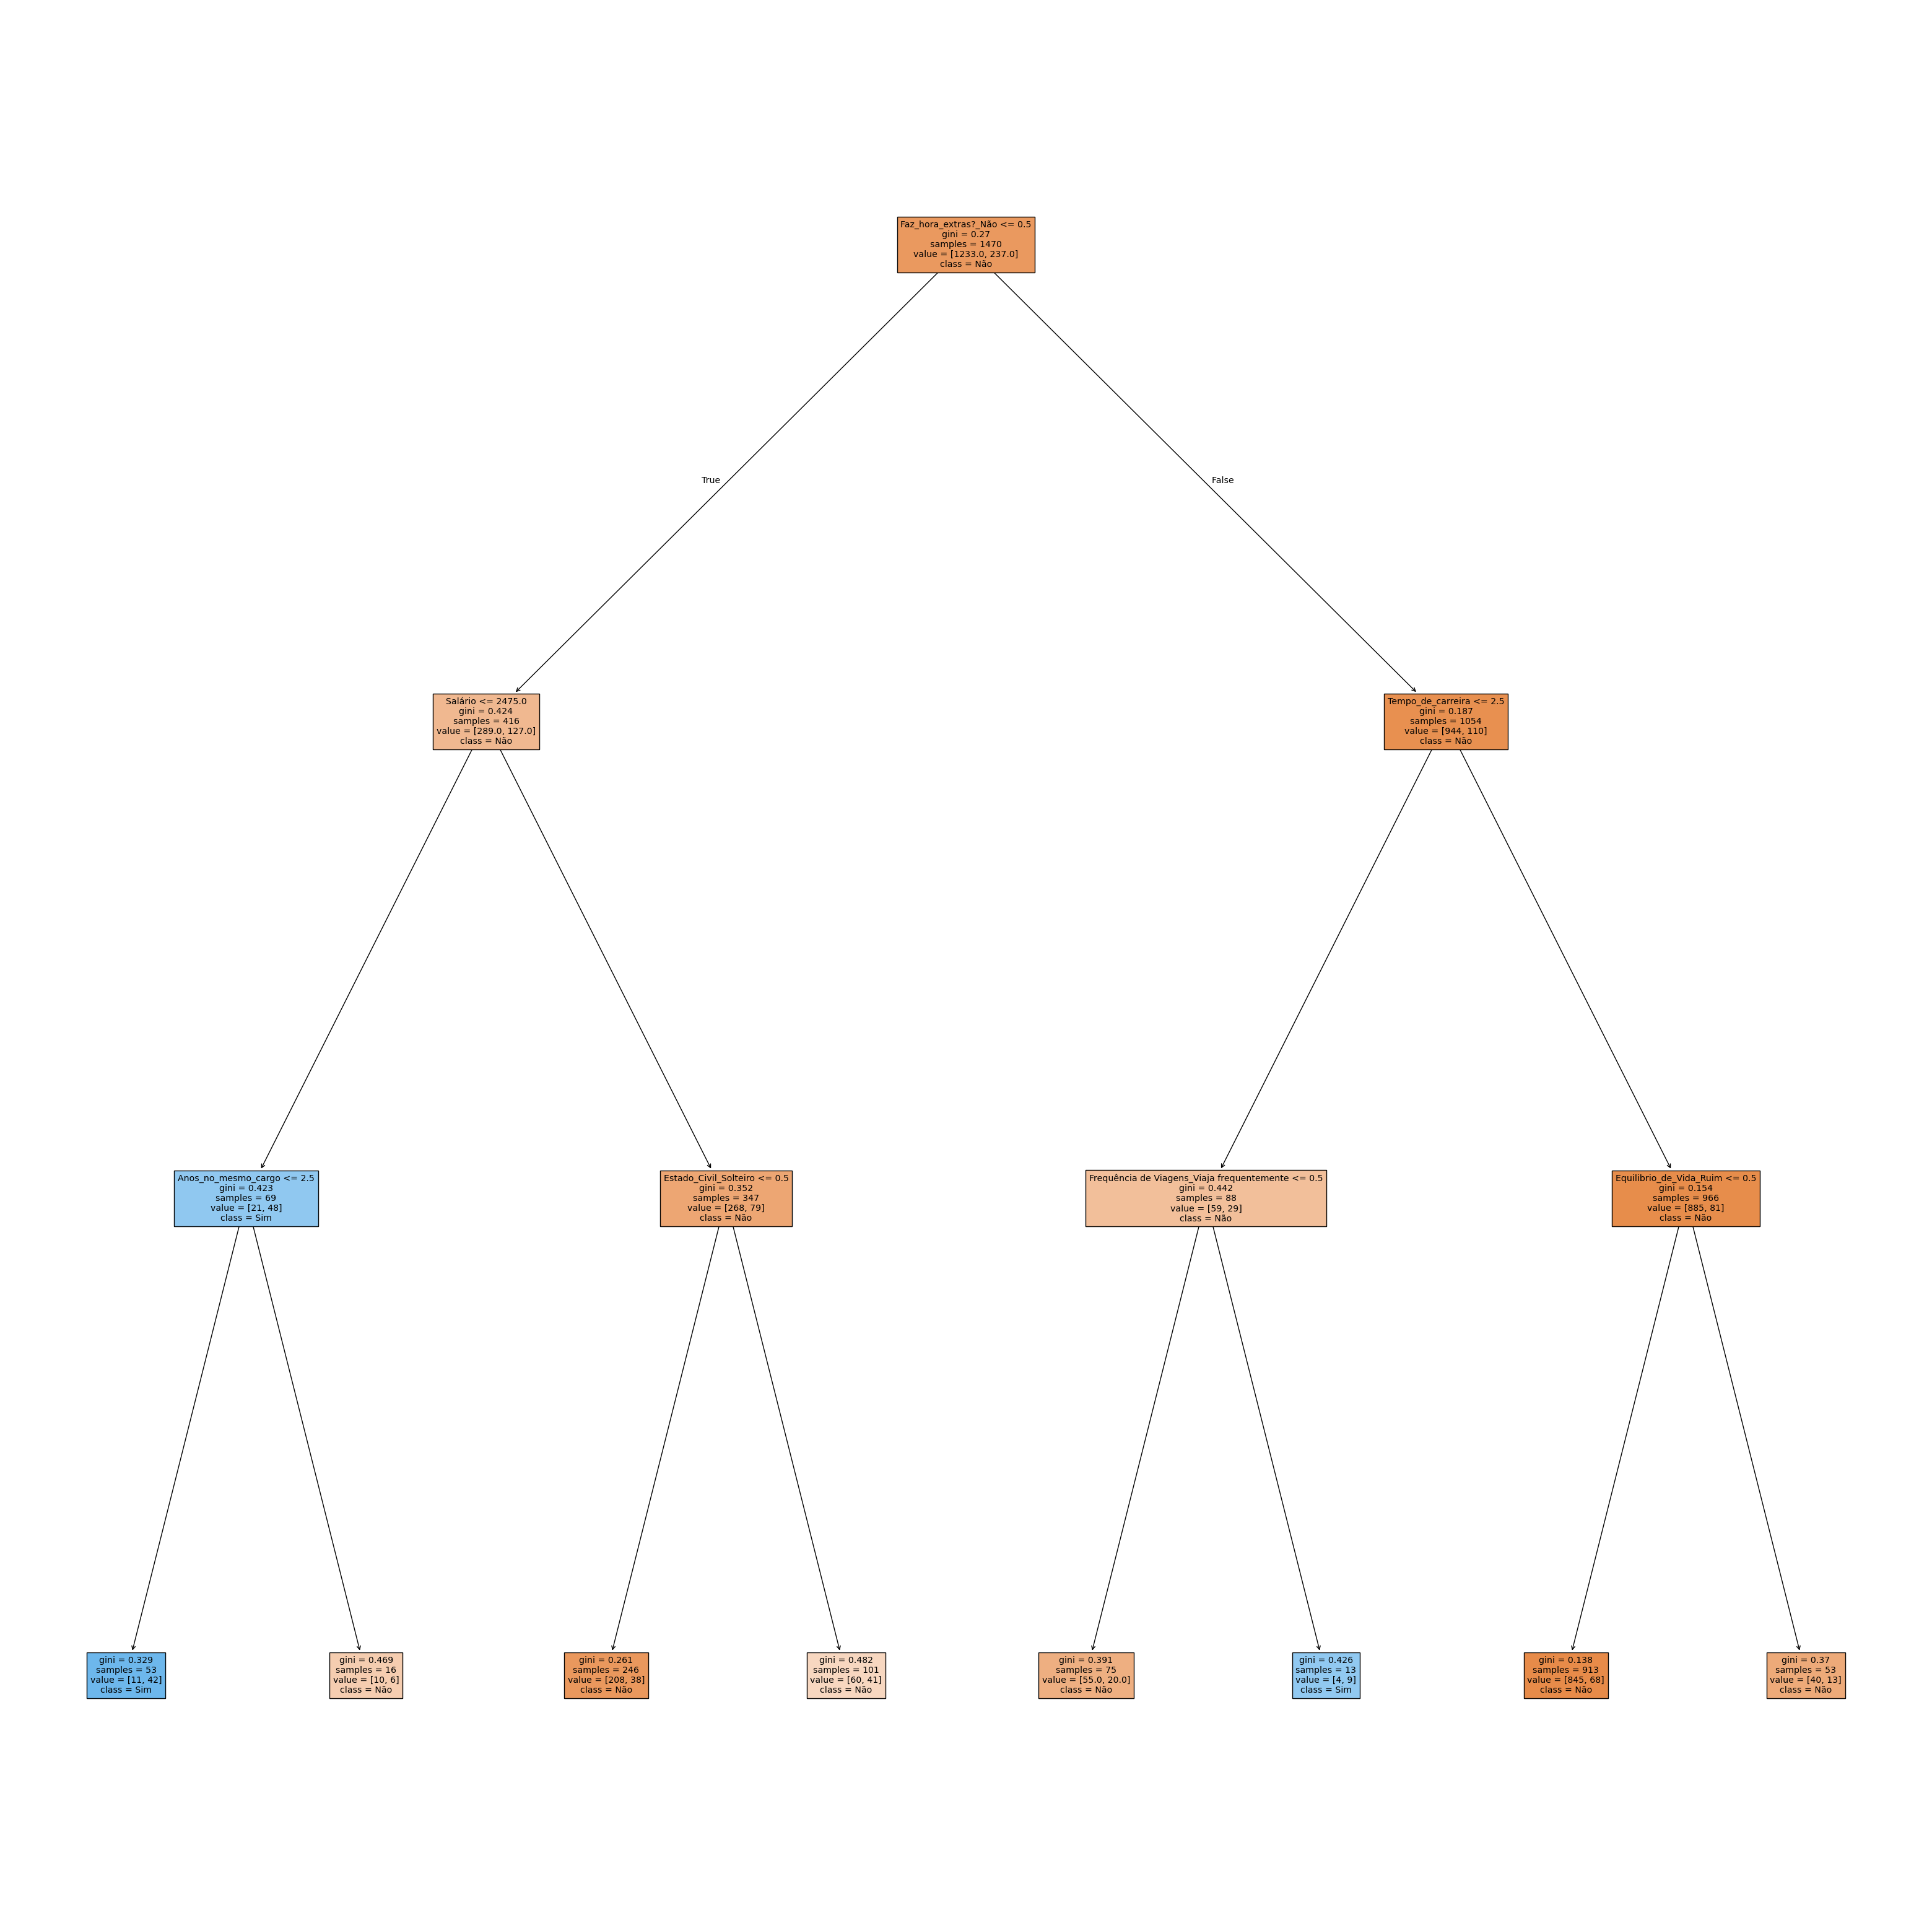

In [21]:
#Avaliaçao do modelo treinado
plt.figure(figsize=(40,40));
tree.plot_tree(modelo_turnover,
               feature_names=x.columns,
               class_names=["Não","Sim"],
               filled=True,
               );